In [153]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("shivam2503/diamonds")

# print("Path to dataset files:", path)

In [154]:
import pandas as pd


In [155]:
df = pd.read_csv('diamonds.csv')

df=df.drop(columns="Unnamed: 0")
##one hot encoding
#df = pd.get_dummies(df, ['cut', 'color', 'clarity'], drop_first=True, dtype=int)

cut_map = {
    "Fair" :1,
    "Good" :2,
    "Premium": 3,
    "Very Good": 4,
    "Ideal" : 5,
}

color_map = {
    "J" : 1,
    "I" : 2,    
    "H" : 3,    
    "F" : 4,    
    "G" : 5,    
    "E" : 6,    
    "D" : 7   
}

clarity_map = {
    "I1" : 1,
    "SI2" : 2,
    "SI1" : 3,
    "VS2" : 4,
    "VS1" : 5,
    "VVS2" : 6,
    "VVS1" : 7,
    "IF" : 8
}

df['cut'] = df['cut'].map(cut_map)
df['color'] = df['color'].map(color_map)
df['clarity'] = df['clarity'].map(clarity_map)

df['volume'] = df['x'] * df['y'] * df['z']
df = df.drop(columns=['x', 'y', 'z'])

df.head(10)

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,6,2,61.5,55.0,326,38.202030
1,0.21,3,6,3,59.8,61.0,326,34.505856
2,0.23,2,6,5,56.9,65.0,327,38.076885
3,0.29,3,2,4,62.4,58.0,334,46.724580
4,0.31,2,1,2,63.3,58.0,335,51.917250
5,0.24,4,1,6,62.8,57.0,336,38.693952
6,0.24,4,2,7,62.3,57.0,336,38.830870
7,0.26,4,3,3,61.9,55.0,337,42.321081
8,0.22,1,6,4,65.1,61.0,337,36.425214
9,0.23,4,3,5,59.4,61.0,338,38.718000


Index(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='str')

In [156]:
subset = df[(df["carat"] > 0.9) & (df["carat"] < 1.1)]
print(subset.groupby("cut")["price"].mean().sort_values())
print(subset.groupby("color")["price"].mean().sort_values())
print(subset.groupby("clarity")["price"].mean().sort_values())

cut
1    3976.186335
2    4866.170325
3    5180.003609
4    5438.815789
5    5911.679002
Name: price, dtype: float64
color
1    3652.728291
2    4087.163077
3    4613.282178
5    5642.214769
4    5654.970471
6    5721.374051
7    6027.636095
Name: price, dtype: float64
clarity
1     2698.492308
2     4111.526094
3     4801.350198
4     5840.741822
5     6453.990506
6     8257.900000
7     8841.398876
8    11096.720930
Name: price, dtype: float64


In [157]:
df.tail()

,carat,cut,color,clarity,depth,table,price,volume
53935,0.72,5,7,3,60.8,57.0,2757,115.920000
53936,0.72,2,7,3,63.1,55.0,2757,118.110175
53937,0.70,4,7,3,62.8,60.0,2757,114.449728
53938,0.86,3,3,2,61.0,58.0,2757,140.766120
53939,0.75,5,7,2,62.2,55.0,2757,124.568444


In [158]:
df.sample(5)

,carat,cut,color,clarity,depth,table,price,volume
12415,1.06,3,4,3,61.0,58.0,5236,177.315600
3555,0.74,4,6,5,62.8,59.0,3416,117.453312
44159,0.57,4,5,4,60.7,58.0,1565,92.387628
29410,0.38,3,3,4,60.5,59.0,700,61.850782
43224,0.40,5,5,8,62.2,55.0,1397,66.418660


In [159]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40000,0.700000,1.040000,5.01000
cut,53940.0,3.872414,1.127563,1.0,3.00000,4.000000,5.000000,5.00000
color,53940.0,4.438246,1.702591,1.0,3.00000,5.000000,6.000000,7.00000
clarity,53940.0,4.051020,1.647136,1.0,3.00000,4.000000,5.000000,8.00000
depth,53940.0,61.749405,1.432621,43.0,61.00000,61.800000,62.500000,79.00000
table,53940.0,57.457184,2.234491,43.0,56.00000,57.000000,59.000000,95.00000
price,53940.0,3932.799722,3989.439738,326.0,950.00000,2401.000000,5324.250000,18823.00000
volume,53940.0,129.849403,78.245262,0.0,65.13683,114.808572,170.842451,3840.59806


In [160]:
df.filter(regex="cut_").columns

Index([], dtype='str')

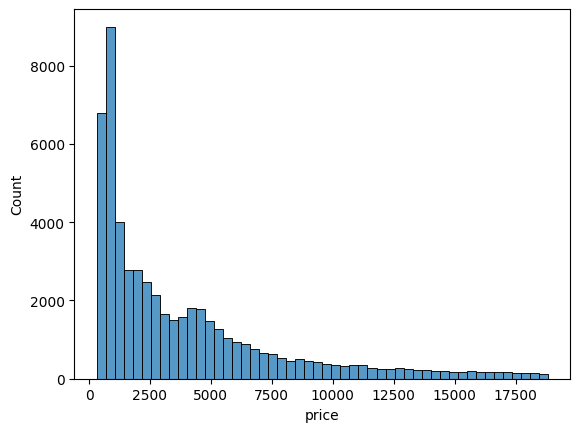

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["price"], bins=50)
plt.show()

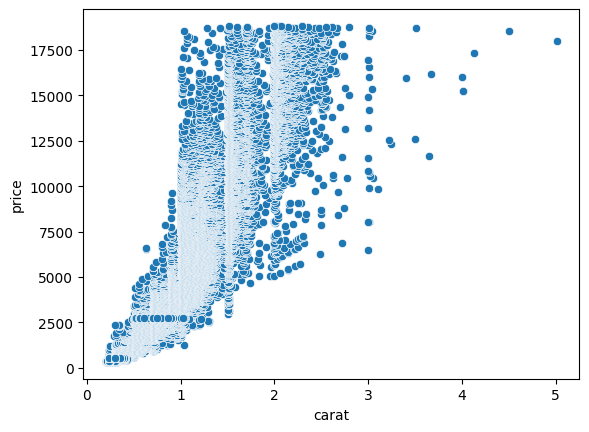

In [162]:
sns.scatterplot(x="carat", y="price", data=df)
plt.show()

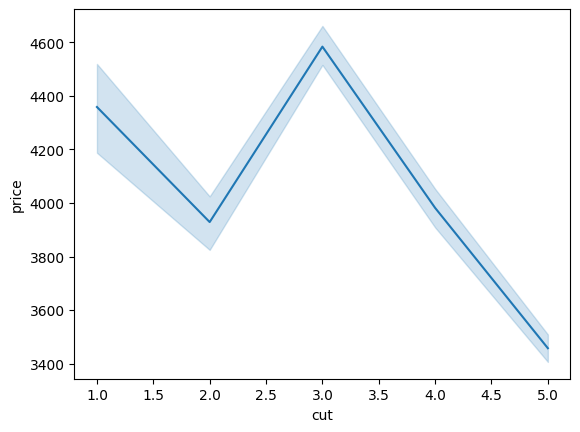

In [163]:
sns.lineplot(x="cut", y="price", data=df)
plt.show()

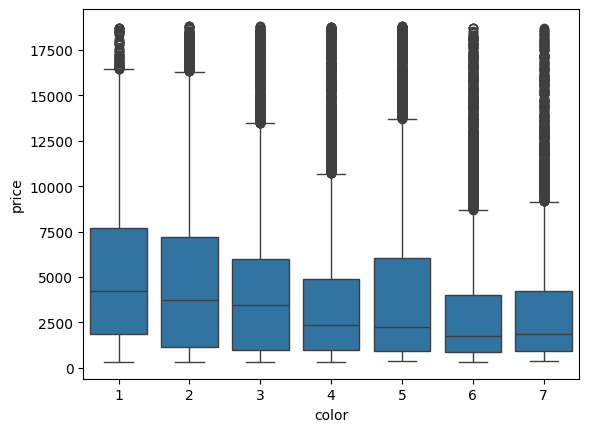

In [164]:
sns.boxplot(x="color", y="price", data=df)
plt.show()

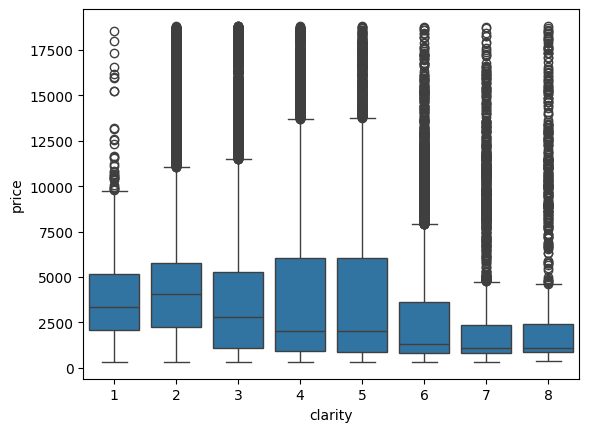

In [165]:
sns.boxplot(x="clarity", y="price", data=df)
plt.show()

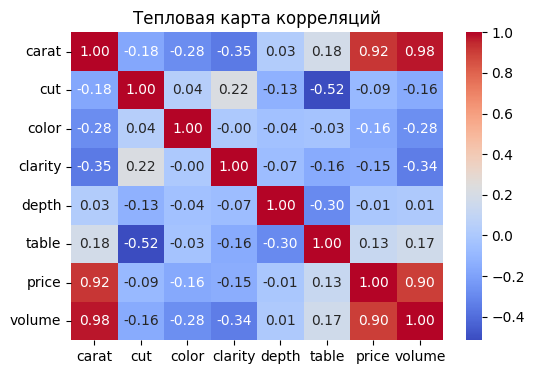

In [166]:
# Тепловая карта корреляций
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Тепловая карта корреляций')
plt.show()

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

y = np.log1p(df["price"])
X = df.drop("price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(8, activation="relu"),
    Dense(1)
])

model.compile(
    optimizer="adam",
    loss="mean_squared_error",
)

history = model.fit(
    X_train, y_train,
    epochs=40,
    validation_split=0.1,
    batch_size=32,
    verbose=1
)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

y = np.log1p(df["price"])
X = df.drop("price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(1, activation='relu')
])

model.compile(
    optimizer="adam",
    loss="mean_squared_error",
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_split=0.1,
    batch_size=32,
    verbose=1
)

Epoch 1/20


1214/1214 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 28.7787 - val_loss: 12.9301
Epoch 2/20
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.5481 - val_loss: 3.1192
Epoch 3/20
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.3408 - val_loss: 1.9549
Epoch 4/20
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7817 - val_loss: 1.5489
Epoch 5/20
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.3409 - val_loss: 1.0942
Epoch 6/20
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8881 - val_loss: 0.6787
Epoch 7/20
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5227 - val_loss: 0.3857
Epoch 8/20
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2999 - val_loss: 0.2332
Epoch 9/20
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1994 - val_loss: 0.1746
Epoch 10/20
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1643 - val_loss: 0.1551
Epoch 11/20
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1511 - val_loss: 0.1456
Epoch 12/20
1214/1214 ━━━━━━━━━━━━━━━━━

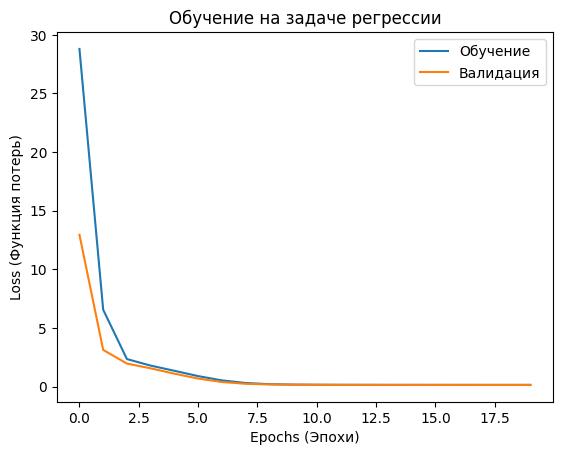

In [169]:
# График обучения
plt.plot(history.history['loss'], label='Обучение')
plt.plot(history.history['val_loss'], label='Валидация')
plt.title('Обучение на задаче регрессии')
plt.xlabel('Epochs (Эпохи)')
plt.ylabel('Loss (Функция потерь)')
plt.legend()
plt.show()

In [170]:
# Оценка модели на тестовых данных
test_loss = model.evaluate(X_test, y_test)
print(f"Метрика средней квадратичной ошибки (MSE): {test_loss}")

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1375
Метрика средней квадратичной ошибки (MSE): 0.1374514102935791


In [171]:
test_loss

0.1374514102935791

In [172]:
preds = model.predict(X_test)
print(preds)

338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step
[[6.9542484]
 [7.3376894]
 [7.2441072]
 ...
 [6.891085 ]
 [8.74311  ]
 [7.935512 ]]
